# Interferometry

### Names: [Insert Names Here]
---

**New Code**
- Calculate the one-dimensional Fourier Transform of a series.
- Calculate the frequencies associated with the one-dimensional Fourier Transform.
- Calculate the amplitude of a complex number.
- Set the size of a figure.
- Read in a .png file.
- Calculate the two-dimensional Fourier Transform
- Calculate the two-dimensional inverse Fourier Transform


As we will see in class, the long wavelengths of radio emission make it difficult to obtain images at high spatial resolution. Spatial resolution can be improved by combining the signal from multiple telescopes to create a telescope with an effective resolution set by the distance between the telescopes. 

Consider two radio telescopes, separated by a distance $u$ in the East-West direction and $v$ in the North-South direction. The signals from these two telescopes are multiplied to create an interference pattern. The amplitude and phase of this interference pattern is then recorded. This process is repeated for each pair of antennas within an array of radio telescopes, resulting in a map of the *visibilities* ($V(u,v)$) as a function of the $u$ and $v$ separations of the different antennas. These visibilities are related to the intensity via: 

$V(u,v) = \int I(l,m)\exp[-i2\pi(ul+vm)]dldm$

where $I(l,m)$ represents the intensity distribution across the sky and $l$ and $m$ are the position on the sky (angular distance from the center of the image). We will discuss in class more about how this equation arises from the interference pattern. The intensity pattern (i.e., the image on the sky) can be obtained by inverting this equation:

$I(l,m) = \int V(u,v)\exp[i2\pi(ul+vm)]dudv$

Because we have a limited number of antennas, the visibilities are only measured at certain values of $u$ and $v$. This has important consequences for the images that are reconstructed from the visibilities. 

Some of you may recognize these equations as those of a two-dimensional Fourier Transform (to go from intensity to visibilities, with an inverse Fourier transform to go from visibilities to intensity). The purpose of this lab, and the subsequent lectures, is *not* to teach you how to take a Fourier Transform (Phys 210 can do that), but instead to help you get an intuition for how the information in an image is stored within the visibilities, and how the positions of the antennas affects the images that are reconstructed from the visibilities. One important takeaway from this lab is the fact that an image is *not* the primary data product from a radio interferometer, and there is some level of processing that is necessary in order to create an image. This has important consequences for what can and cannot be seen in an image.

### Fourier transforms

Let us start by talking about Fourier Transforms. At the heart of a Fourier Transform is a term that looks like this:

$\exp[i\phi]$

This complex exponential is equivalent to:

$\exp[i\phi] = \cos(\phi) + i\sin(\phi)$

This means that a Fourier Transform takes a signal ($f(x)$) and breaks it up into a series of sine and cosine curves of different frequencies ($k$). 

$F(k) = \int f(x)\exp[-i2\pi kx]dx$

The Fourier Transform ($F(k)$) represents that amplitude and phase of the sine and cosine curves at different frequencies. For our radio telescope, $f(x)$ represents the distribution of flux on the sky, while the frequencies correspond to the distance between our radio antennas (higher frequencies correspond to telescopes that are farther apart). 

But before we dig in to radio telescopes, let us look at some simple one-dimensional examples of a Fourier Transform.

In [1]:
#Import the packages that we will use
import numpy as np
import matplotlib.pyplot as plt

Let us start with two sine curves of different frequencies. Since a Fourier transform breaks a signal down into a combination of sine and cosines, a sine curve should have a simple Fourier transform.

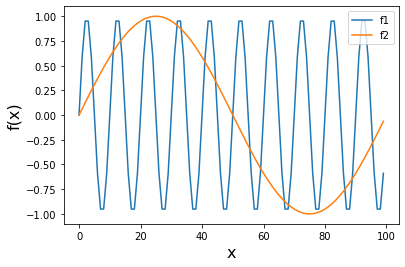

In [2]:
# Let us start with two sine curves, with different frequencies

x = np.arange(100)
freq1 = .1 # High frequency
freq2 = .01 # Low frequency
f1 = np.sin(2*np.pi*x*freq1)
f2 = np.sin(2*np.pi*x*freq2)

plt.plot(x,f1)
plt.plot(x,f2)

plt.xlabel('x',fontsize='16')
plt.ylabel('f(x)',fontsize='16')
plt.legend(('f1','f2')) # This adds a legend so that we know which line is which

What would you expect if we took the Fourier Transform of each of these functions? The Fourier transform should have a large amplitude at the frequency of the sine curve, with zero amplitude at other frequencies.

Note: The Fourier transform has a real and imaginary part because of the complex exponential. Instead of talking about the real and imaginary part, we will talk about the amplitude and phase. The amplitude and phase can be calculated as:

${\rm amplitude} = \sqrt{({\rm real\ part})^2 + ({\rm imaginary\ part})^2}$

${\rm phase} = \arctan\left(\frac{{\rm imaginary\ part}}{{\rm real\ part}}\right )$

In python, the amplitude can be calculated using the `np.abs` function within numpy. This function nominally calculates the absolute value of a number, but also calculates the amplitude of a complex number.

>**Q:** The code below is missing some pieces. Fill in the missing pieces so as to label the graphs.

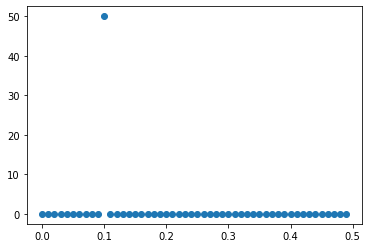

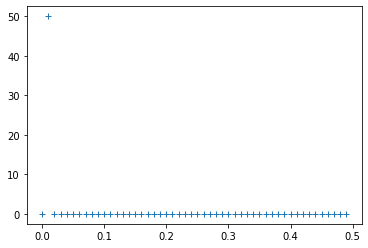

In [3]:
fft1 = np.fft.fft(f1) #Take the one-dimensional Fourier Transform
fft2 = np.fft.fft(f2)


freq = np.fft.fftfreq(f1.shape[0]) #Calculates the frequencies
N=len(freq)

plt.plot(freq[:N//2],np.abs(fft1)[:N//2],'o') #The second half of the frequency list is filled with negative frequencies. We will ignore them for now
#Add a vertical line at freq1
# Label the X-axis as Amplitude and label the y-axis as Frequency
# Add a title indicating that this figure is the Fourier Transform of f1(x)
#plt.axvline(freq1,ls=':')
#plt.ylabel('Amplitude',fontsize='16')
#plt.xlabel('Frequency',fontsize='16')
#plt.title('F1(k)',fontsize='16')
plt.show()

plt.plot(freq[:N//2],np.abs(fft2)[:N//2],'+')
#Add a vertical line at freq2
# Label the X-axis as amplitude and label the y-axis as Frequency
# Add a title indicating that this figure is the Fourier Transform of f2(x)
#plt.axvline(freq2,ls=':')
#plt.ylabel('Amplitude',fontsize='16')
#plt.xlabel('Frequency',fontsize='16')
#plt.title('F2(k)',fontsize=16)
plt.show()

The Fourier Transform of $f1(x)$ has zero amplitude at all frequencies, except for one frequency. The same is true of the Fourier transform of $f2(k)$, but here the frequency at which it has non-zero amplitude is smaller, as expected.

Now lets consider a more complicated example

> **Q:** Create a variable `f3` that is the sum of `f1` and `f2`. Plot this new variable as a function of `x`, making sure to label the axes.


In [4]:
#insert code here

> **Q:** What do you predict for the Fourier transform of `f3`

**[insert answer here]**

> **Q:** Compute and plot the fourier transform of `f3`. What do you notice about the result?

In [5]:
#insert code here

Now lets look at a more complex case; a function that is zero everywhere, except for a narrow range of positions, where the value is one

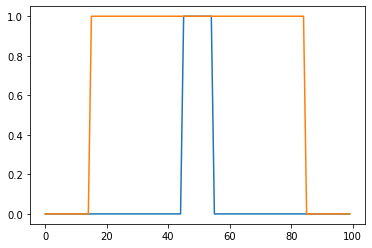

In [6]:
#Now let us consider something different: a step function
step1 = np.zeros(len(x))
step1[45:55] = 1 #A narrow step function
step2 = np.zeros(len(x))
step2[15:85] = 1 #A wider step function

plt.plot(x,step1)
plt.plot(x,step2)
#Add a legend and label the X and Y axis

Text(0.5, 0, 'Frequency')

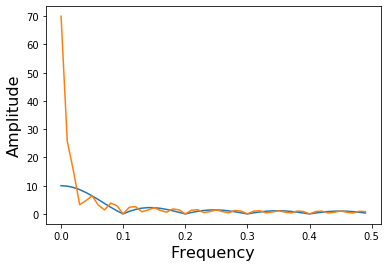

In [7]:
#Lets calculate the Fourier Transform of these two functions
fft_step1 = np.fft.fft(step1) #insert code to calculate the Fourier Transform of step1
fft_step2 = np.fft.fft(step2) #insert code to calculate the Fourier Transform of step2

freq = np.fft.fftfreq(step1.shape[0])
N=len(freq)
plt.plot(freq[:N//2],(np.abs(fft_step1)[:N//2]))
plt.plot(freq[:N//2],(np.abs(fft_step2)[:N//2]))

plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')

Now, instead of having a non-zero amplitude at a single frequency, we have a non-zero amplitude at a wide range of frequencies. The difference in the two Fourier transforms reflects differences in the shape of the two step functions. 

> **Q:** Which frequency component is the strongest in both Fourier transforms?

**[insert answer here]**

> **Q:** How does the shape differ between the two curves? How is this related to the width of the step? 

**[insert answer here]**

One application of the Fourier Tranform of a step function is in optical telescopes. The illumination of the primary mirror by photons by a distant object is similar to the step function (the mirror collects photons that fall onto its surface, but misses photons that fall outside of its surface). The width of the step function corresponds to the diameter of the telescope.

The Fourier transform of the illumination pattern (in particular, the square of the amplitudes) is then the image that is created on our CCD detector. In this case the x-axis of the Fourier transform is position on the detector, while the y-axis is related to the strength of the signal. In the example above you saw that the wider step function, corresponding to a telescope with a larger diameter mirror, produced a narrower signal, as expected from the relation between telescope diameter and angular resolution ($\theta = \lambda / D$).

This behavior allows us to consider more complex situations.
>**Q:** A secondary mirror will block out some of the light from reaching the primary mirror. This can be modeled as a step function in which a region in the middle has a value of zero. Take `step2` and set the values between position 45 and 55 to 0. Calculate and plot the Fourier Transform of this new step function. How does it differ from the case when there is no secondary mirror?


Text(0.5, 0, 'Frequency')

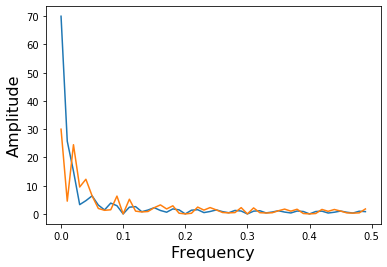

In [8]:
#insert code here
step3 = step2
step3[30:70] = 0
fft_step3 = np.fft.fft(step3)
plt.plot(freq[:N//2],np.abs(fft_step2)[:N//2])
plt.plot(freq[:N//2],np.abs(fft_step3)[:N//2])

plt.ylabel('Amplitude',fontsize='16')
plt.xlabel('Frequency',fontsize='16')

### Two-dimensional Fourier transforms

As discussed above, the signal measured by a radio interferometer is the two-dimensional Fourier transform of the image on the sky. That Fourier transform is sampled at different frequencies, corresponding to the distances between pairs of antennas. The incomplete sampling of frequencies leads to complications when trying to reconstruct an image.

Lets load a non-astronomical image and see what the two-dimensional Fourier Transform looks like.

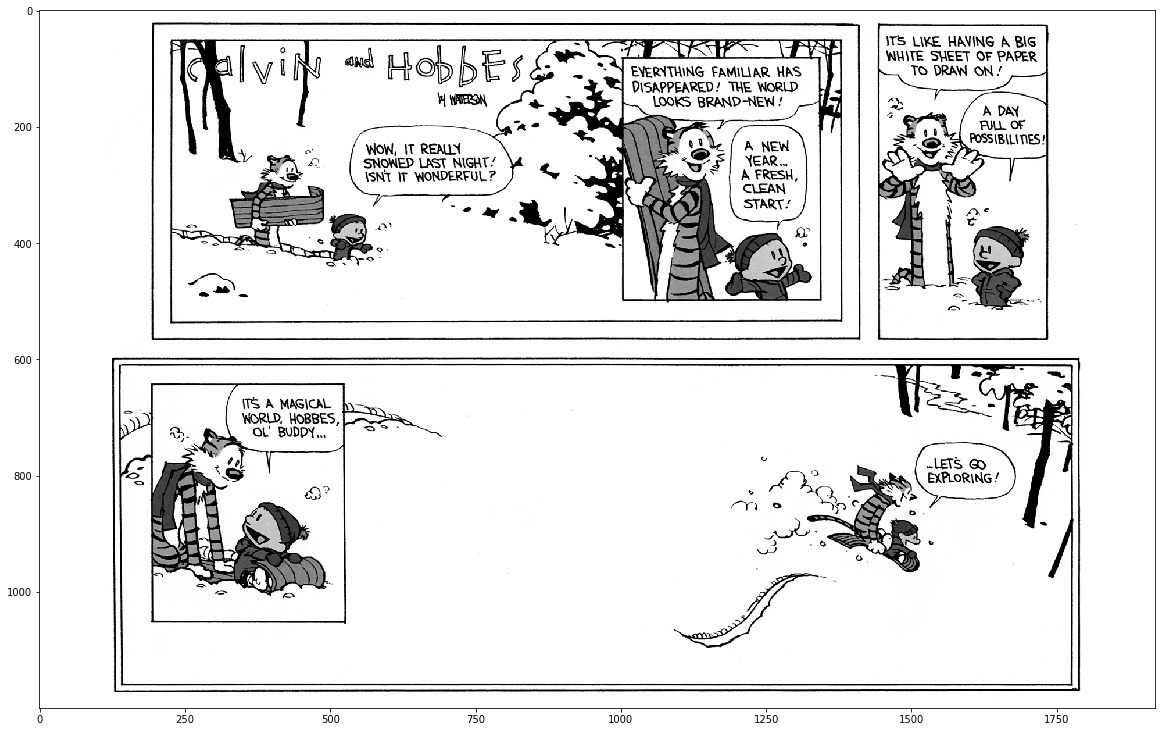

In [9]:
ch_image = plt.imread('CH_last-ConvertImage.png') #Load in the image
fig = plt.figure(figsize=(20,20)) #Make the image bigger than normal so that it is legible.
plt.imshow(ch_image,plt.cm.gray) #Show the image

Now lets take the Fourier Transform of this image and see what it looks like.

In [10]:
from matplotlib.colors import LogNorm

#Create a function that will plot the 2D Fourier Transform on a logarithmic scale
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft),norm=LogNorm(vmin=5))
    plt.axvline(im_fft.shape[1]/2,color='r',ls='--')
    plt.axhline(im_fft.shape[0]/2,color='r',ls='--')
    plt.colorbar()

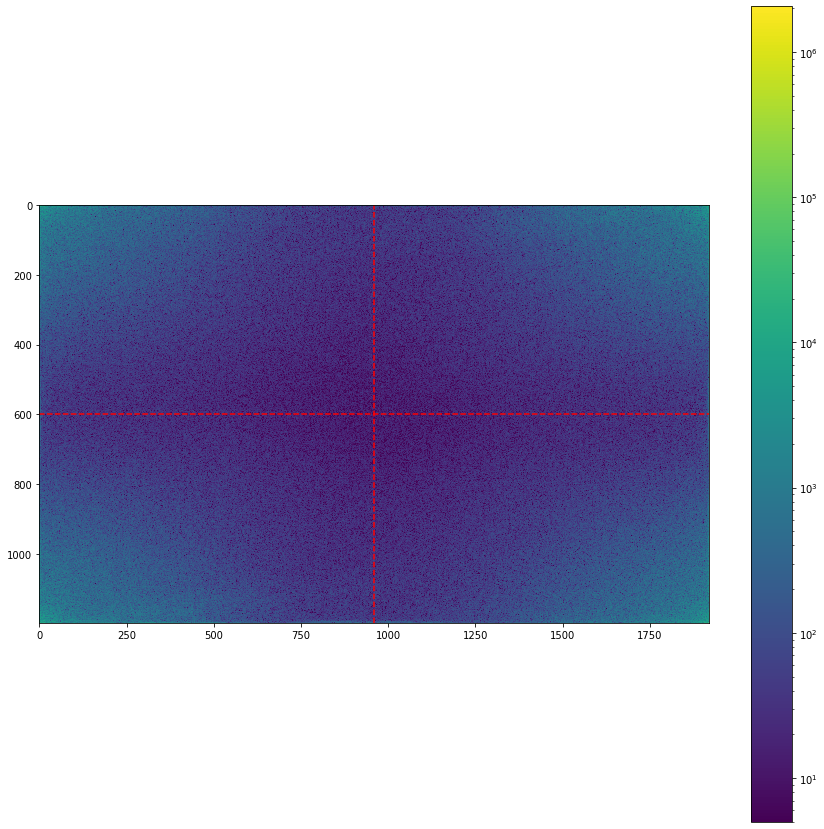

In [11]:
#Create and plot the Fourier Transform
fft_ch = np.fft.fft2(ch_image) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch)

We now have two frequencies ($k_x$ and $k_y$) corresponding to the two physical dimensions of the image. The X-axis on the Fourier transform corresponds to sine and cosines along the X-direction of the image (e.g. $\cos(2\pi k_x x)$) while the Y-axis on the Fourier Transform corresponds to sines and cosines along the Y-direction of the image (e.g. $\cos(2\pi k_y y)$). Note: the numbers on the axes above do not correspond to the frequencies, but simply the index number of the array containing the Fourier Transform.

The upper left position corresponds to $k_x$=0 and $k_y$=0. Moving along either axis the frequencies increase until reaching the halfway point (marked by the red lines). At this point the frequencies become negative and decrease back down to zero. This induces the symmetry in the Fourier Transform figure; the upper left (and upper right and lower right and lower left) correspond to $k_x=0$ and $k_y=0$ and hence have the sample amplitude.



In [12]:
# Answer the questions in the next two lines:
kx = np.fft.fftfreq(ch_image.shape[0]) #What does this line do?
ky = np.fft.fftfreq(ch_image.shape[1]) #What does this line do?
print('Number of frequencies in the X-direction: ',len(kx))
print('Number of frequencies in the Y-direction: ',len(ky))

# Check that the frequencies are zero in each of the corners
print('Frequency in upper left: {:0.1f},{:0.1f}'.format(kx[0],ky[0]))
print('Frequency in lower right: {:0.1f},{:0.1f}'.format(kx[-1],ky[-1]))
print('Frequency in lower left: {:0.1f},{:0.1f}'.format(kx[-1],ky[0]))
print('Frequency in upper right: {:0.1f},{:0.1f}'.format(kx[0],ky[-1]))

Number of frequencies in the X-direction:  1200
Number of frequencies in the Y-direction:  1920
Frequency in upper left: 0.0,0.0
Frequency in lower right: -0.0,-0.0
Frequency in lower left: -0.0,0.0
Frequency in upper right: 0.0,-0.0


>**Q:** What frequencies have the strongest signal in the Fourier Transform of the comic?

>**Q:** What are the largest frequencies in the Fourier Transform?

In [13]:
#insert code here

If we reconstructed the image from this Fourier Transform we would exactly reproduce the original image. But radio interferometers do not collect information at every frequency, and we must attempt to recreate the image from this incomplete information. This affects the type of image that is reconstructed.

First lets consider an example in which we are missing information from high spatial frequencies

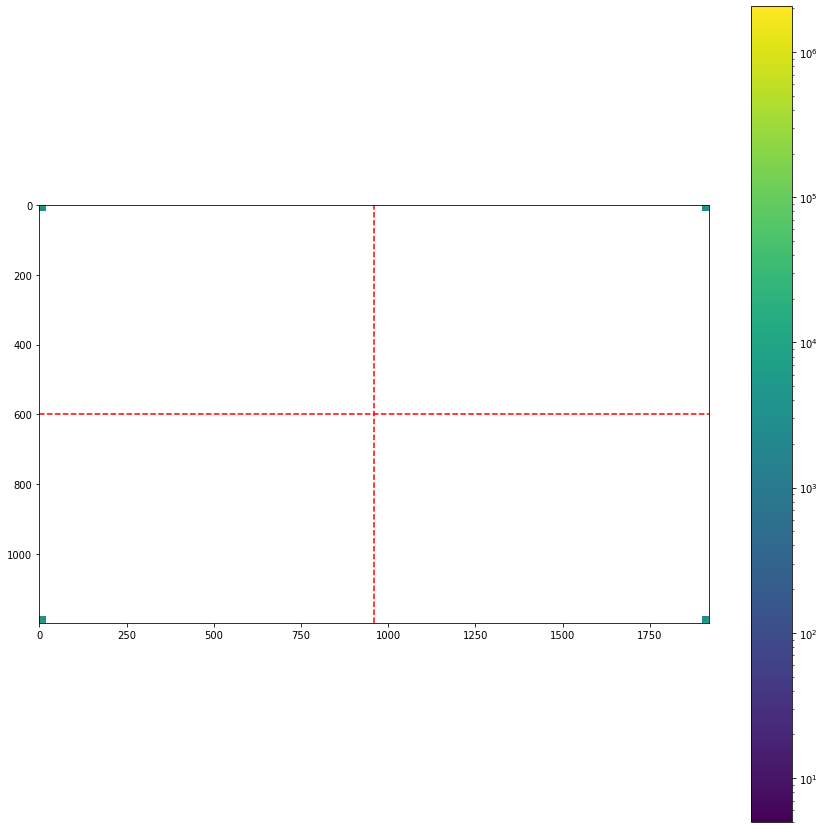

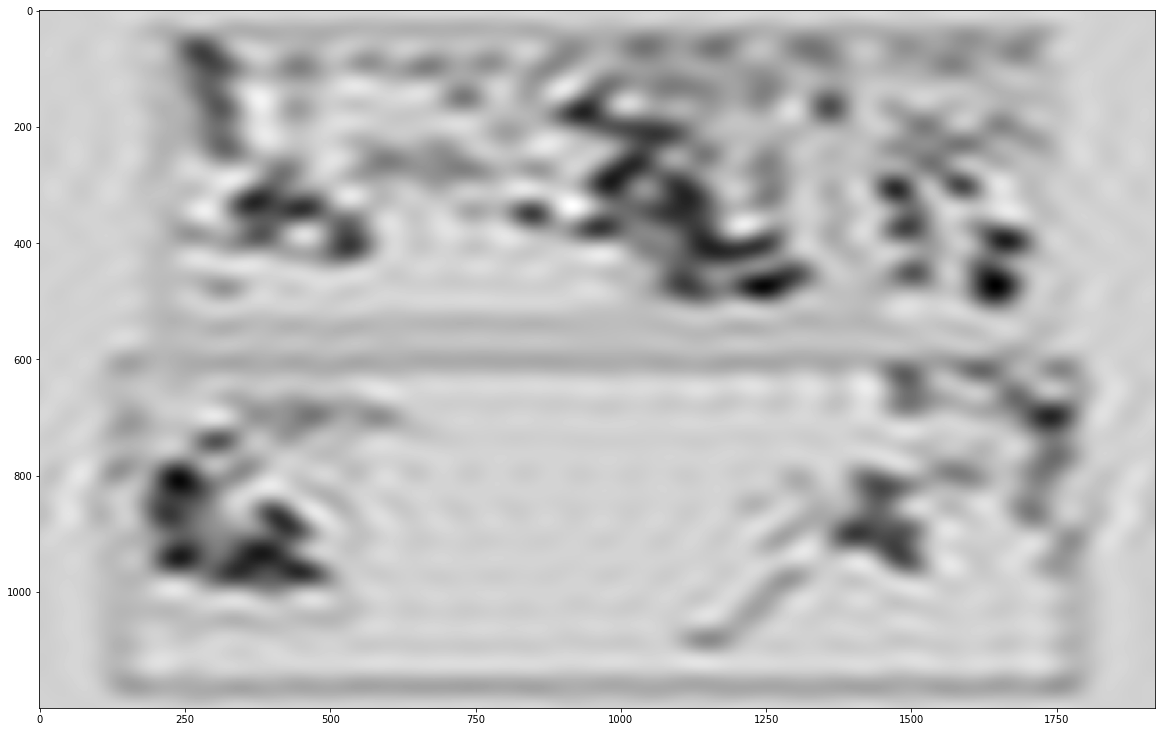

In [14]:
fft_ch_copy = fft_ch.copy() #Copy the Fourier Transform into a new variable
fig = plt.figure(figsize=(15,15))
fft_ch_copy[20:np.shape(fft_ch)[0]-20,:] = 0 #Set the Fourier Transform to zero everywhere except for the first, and last, twenty frequencies
fft_ch_copy[:,20:np.shape(fft_ch)[1]-20] = 0 #Same as above but in the Y-direction
plot_spectrum(fft_ch_copy) #Plot the Fourier Transform so we can see the damage that we have done
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real #Take the inverse Fourier Transform, which reconstructs an image
plt.imshow(new_ch,plt.cm.gray)

>**Q:** The different frequencies correspond to features at different spatial scales in the image. Based on what you see above, do low frequencies contain information on large or small spatial scales in an image?

**[insert answer here]**

>**Q:** Do low frequencies correspond to radio antennas that are close together or far apart? 

**[insert answer here]**

>**Q:** In the block below, reconstruct an image that is built from a scenario in which the 20 lowest frequencies are set to zero, while the high frequency information is preserved. What features appear in this image that were missing from the previous image?

**[insert answer here]**


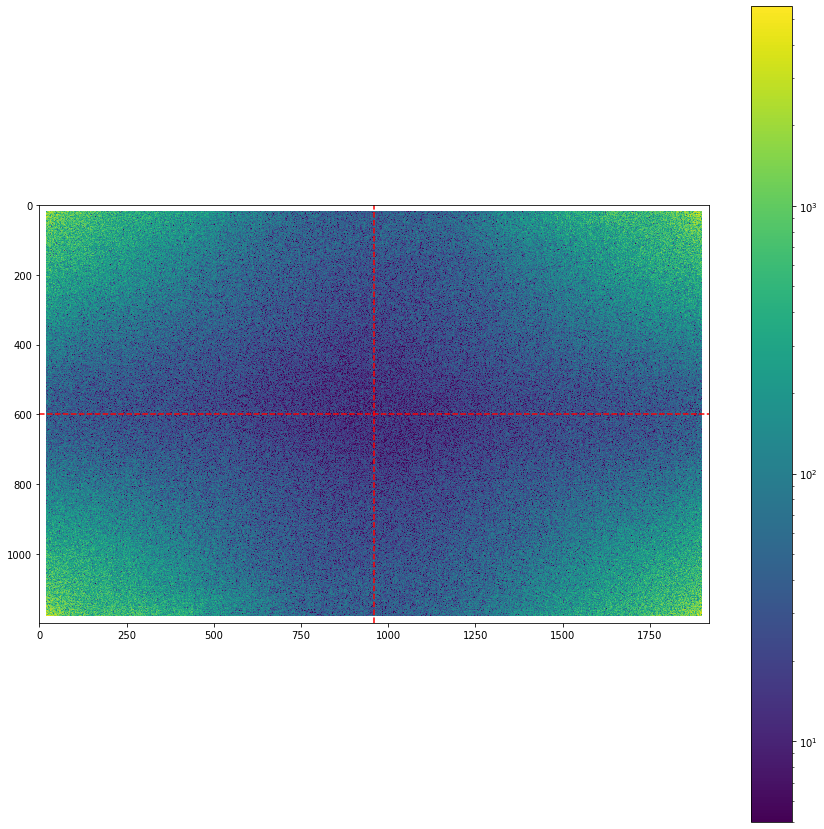

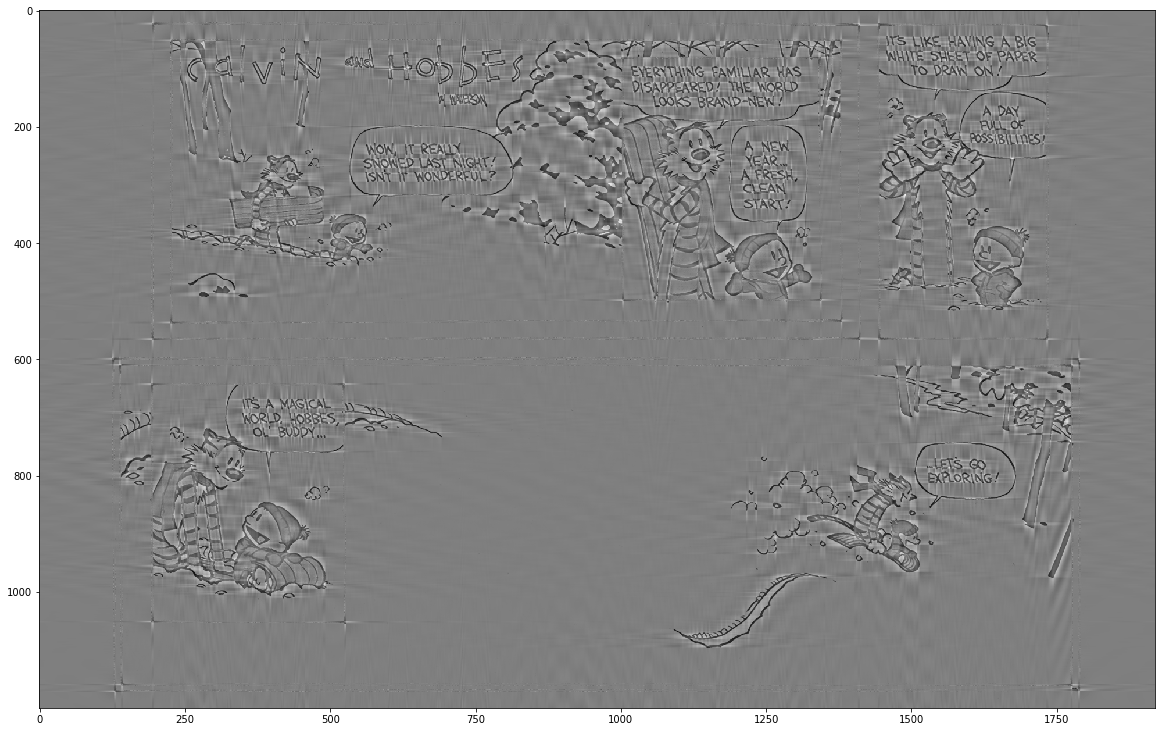

In [15]:
#insert code here
fft_ch_copy = fft_ch.copy()
fft_ch_copy[:20,:] = 0
fft_ch_copy[np.shape(fft_ch)[0]-20:,:] = 0
fft_ch_copy[:,:20] = 0
fft_ch_copy[:,np.shape(fft_ch)[1]-20:] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch_copy)
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real
plt.imshow(new_ch,plt.cm.gray)

What happens if we are missing *some* of the short or long frequency measurements? This causes additional complications.

Below we consider the artificial example in which we are missing the information from every tenth frequency. 

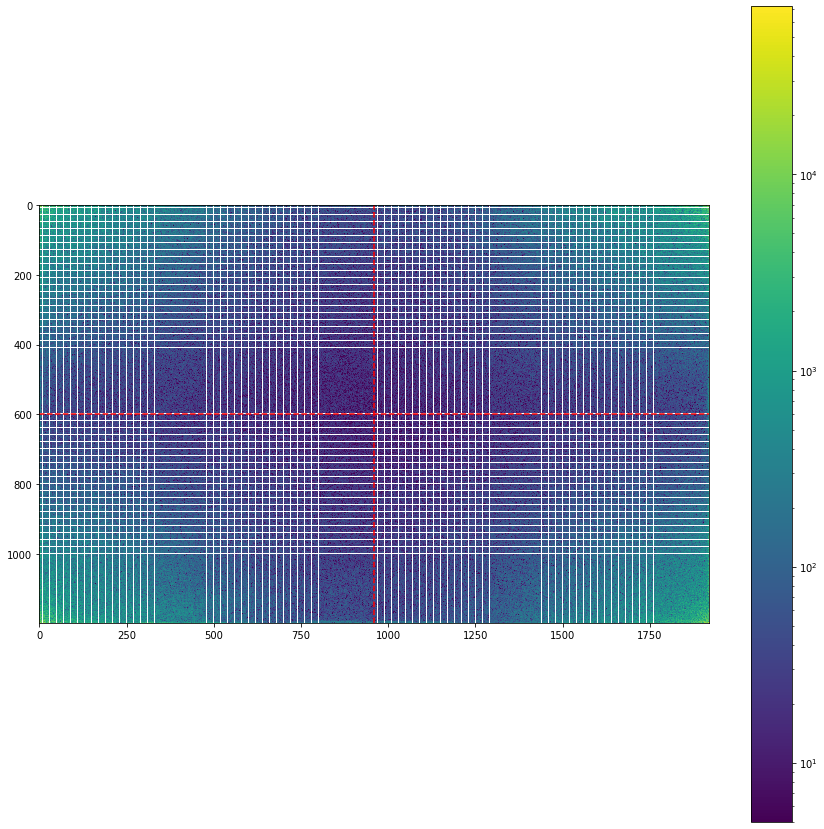

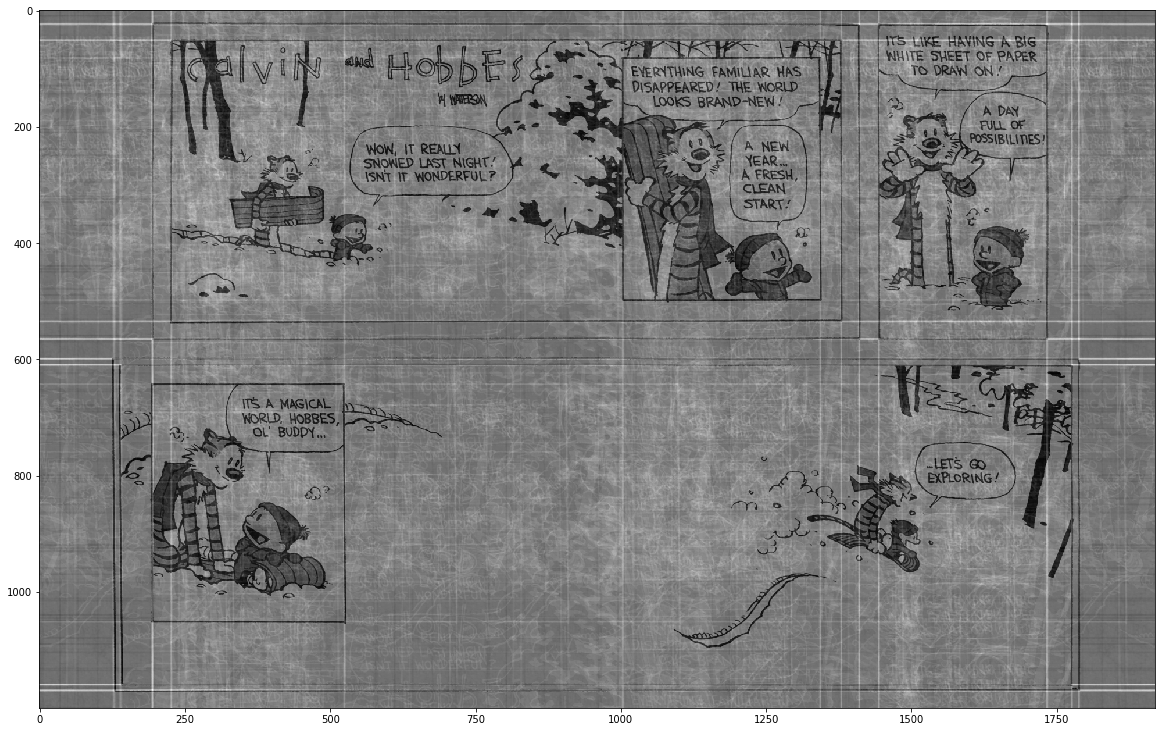

In [16]:
fft_ch_copy = fft_ch.copy()
fft_ch_copy[::10,:] = 0 #Simulates a situation in which are missing information on every tenth frequency 
fft_ch_copy[:,::10] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch_copy)
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real
plt.imshow(new_ch,plt.cm.gray)

The missing information leads to a host of artifacts within the reconstructed image. It introduces structures that were not present in the original image. This can cause complications if we were to e.g. measure the 'flux' from a region of this image. 

>**Q:** Radio interferometers generally get better sampling at small frequencies than at larger frequencies. Suppose that we had information from all frequencies up to the 20th position, and then every other frequency from then onwards. What does the reconstructed image look like? Remember that beyond the halfway point the frequencies become negative, and small frequencies occur at both the beginning and end of the array.


*Note*: Above you saw the syntax array[::10] which steps through the entire array, selecting out every 10th element. To step like this through a limited range of indeces, enter array[start:stop:10] -> this goes from the index `start` to the index `stop` in steps of 10. For example, array[52:102:10] would select out the elements with an index of 52, 62, 72, 82, and 92. 

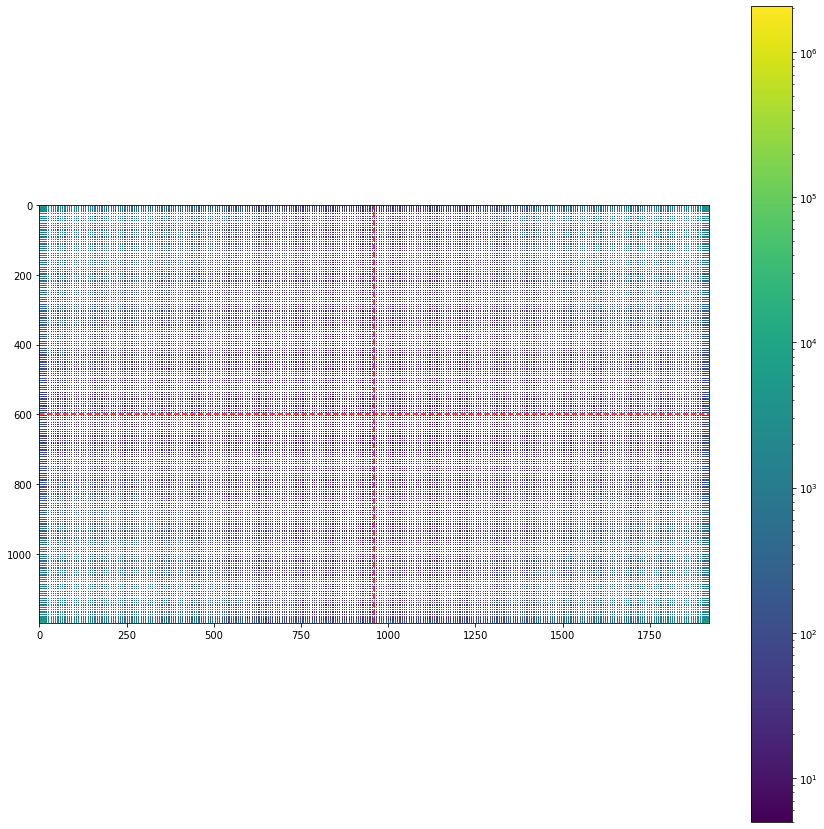

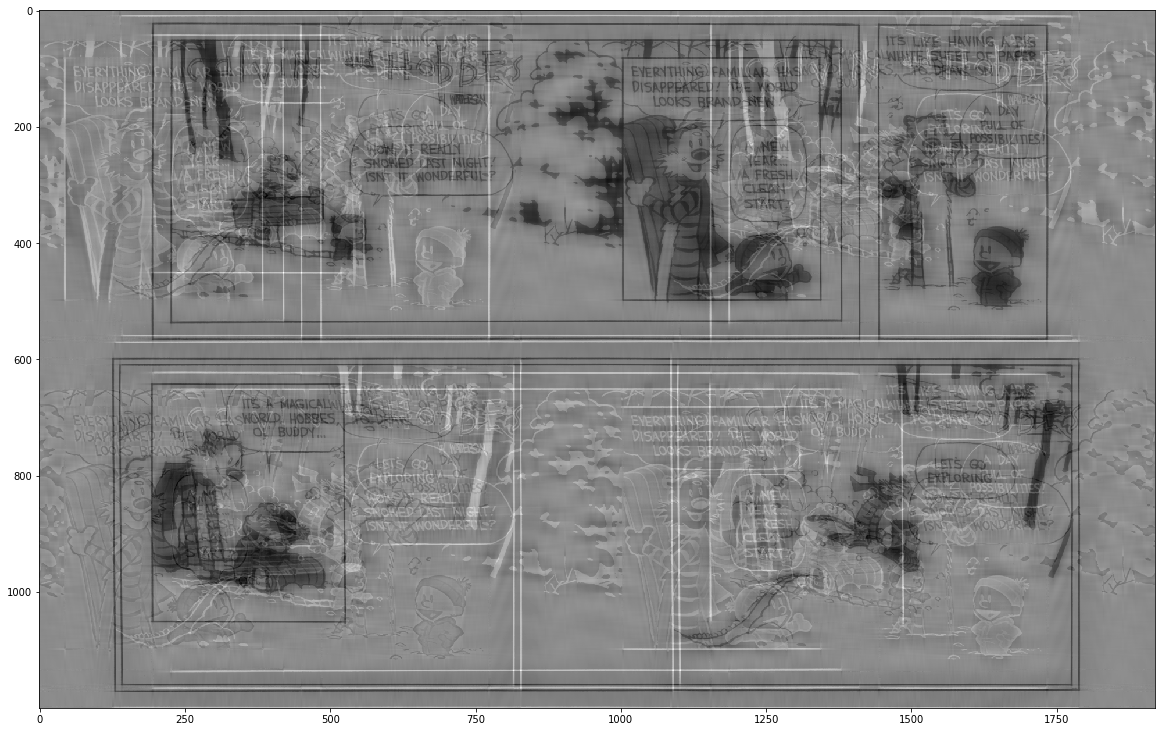

In [17]:
#insert code here
fft_ch_copy = fft_ch.copy()
fft_ch_copy[20:np.shape(fft_ch)[0]-18:2,:] = 0 #Simulates a situation in which are missing information on every tenth frequency 
fft_ch_copy[:,20:np.shape(fft_ch)[1]-18:2] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_ch_copy)
plt.show()

fig = plt.figure(figsize=(20,20))
new_ch = np.fft.ifft2(fft_ch_copy).real
plt.imshow(new_ch,plt.cm.gray)

**Stop Here** When you are done, email this notebook to Dr. Flaherty. 